In [1]:
import pandas as pd
from src import subfunc as sf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TARGET = 'сыпуч известь РП'
SOURCE_DIR = '../../source/'
FINAL_STAGE_DIR = 'final_stage/'
DATA_DIR = '../../data/'

In [3]:
data = pd.read_csv('../../data/evras.csv', sep=';', index_col='index', decimal=',')
data

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,,,,,,,,,
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,г68386398<;,2071-04-21 19:50:00,Э90ХАФ,Р65,41.0,42.333333,23.200000,42.166667,3.380628,0.537080,...,0.10,2.6,22.2,7.0,60.6,0.4,6.2,0.06,2.7,22.8
7037,г68386398<<,2071-04-21 20:45:00,Э90ХАФ,Р65,36.0,46.533333,16.183333,46.383333,NaN,0.555875,...,0.10,2.2,24.5,4.9,53.0,0.5,11.1,0.25,2.4,22.3
7038,г68386398<=,2071-04-21 21:34:00,Э90ХАФ,Р65,42.0,47.566667,23.016667,47.100000,2.263004,0.548385,...,0.13,2.7,20.0,5.2,55.4,0.7,6.7,0.13,2.2,25.0


 * Нахождение самой популярной марки

In [4]:
top_mark = data['МАРКА'].value_counts().index[0]

#Получение данных с нашей маркой

marked_data = data[data['МАРКА'] == top_mark]

* Удаление незначащих признаков

In [5]:
marked_data = marked_data.drop(columns=['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ'])

* Получив больше информации про легировании стали, мы узнали что  NaN значения в ферсплавов, возможно означают, что их просто не добавляли в котел, поэтому зануляем их

In [6]:
Fe_columns = list()
for col in marked_data.columns:
    if 'Fe' in col:
        Fe_columns.append(col)

In [7]:
marked_data[Fe_columns] = marked_data[Fe_columns].fillna(0)

* Удаляем признаки, содержащие меньше 40% данных (Такой threshold был подобран опытным путем)

In [8]:
dropped_data, dropped_features = sf.drop_columns(marked_data, threshold=0.6)
marked_data = marked_data.drop(columns=dropped_features)
marked_data.info()

Удаленные колонки: N2 (интенс.), расход газ  N2, расход C пров., сыпуч кварцит, сыпуч  кокс. мелочь (сух.), ферспл  Ni H1 пласт., ферспл  ферванит
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 7026
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   t вып-обр                       4432 non-null   float64
 1   t обработка                     4429 non-null   float64
 2   t под током                     4429 non-null   float64
 3   t продувка                      4432 non-null   float64
 4   ПСН гр.                         3590 non-null   float64
 5   чист расход C                   4426 non-null   float64
 6   чист расход Cr                  4417 non-null   float64
 7   чист расход Mn                  4423 non-null   float64
 8   чист расход Si                  4423 non-null   float64
 9   чист расход V                   4414 non-null   float64
 10  температу

* Удаляем строки, где пропущены значения для целевых переменных

In [9]:
notna_rows_target = marked_data[TARGET].dropna(axis=0).index
marked_data = marked_data.loc[notna_rows_target]

* Заполнение пропущенных значений методом MICE

In [10]:
marked_data = sf.fill_empty_values(marked_data)

* Удаление шумов с помощью LocalOutlierFactor

In [11]:
marked_data = sf.remove_noises(marked_data)

* Нормализация данных

In [12]:
normalized_data = sf.normalize_data(marked_data.drop(columns=TARGET))
normalized_data[TARGET] = marked_data[TARGET]

* Оставляем в датасете наиболее значимые признаки, используя решающие деревья

['t вып-обр', 't обработка', 't под током', 't продувка', 'ПСН гр.', 'чист расход C', 'чист расход Mn', 'чист расход Si', 'чист расход V', 'температура первая', 'температура последняя', 'Ar (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь', 'расход газ Ar', 'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл  FeV-80', 'ферспл  Mn5Si65Al0.5', 'ферспл  фх850А', 'эл. энергия', 'химсталь первый C_1', 'химсталь первый Cu_1', 'химсталь первый Mn_1', 'химсталь первый Ni_1', 'химсталь первый S_1', 'химсталь первый Si_1', 'химсталь последний C', 'химсталь последний Cu', 'химсталь последний Ni', 'химсталь последний S', 'химсталь последний Si', 'химшлак первый Al2O3_1', 'химшлак первый CaO_1', 'химшлак первый FeO_1', 'химшлак первый MgO_1', 'химшлак первый MnO_1', 'химшлак первый R_1', 'химшлак первый SiO2_1', 'химшлак последний CaO', 'химшлак последний FeO', 'химшлак последний MgO', 'химшлак последний SiO2']


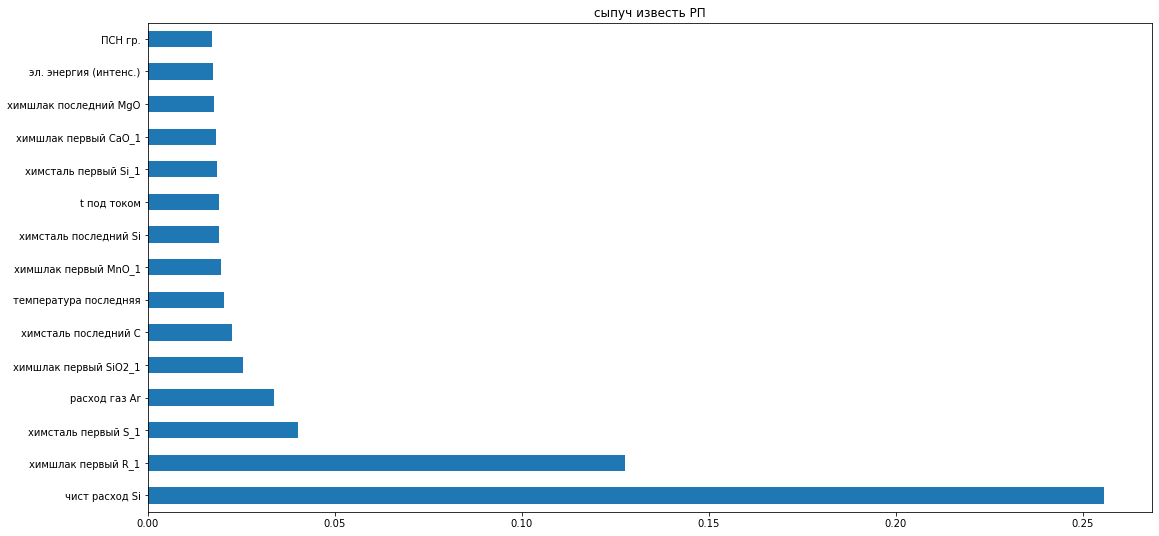

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor().fit(marked_data.drop(columns=TARGET), marked_data[TARGET])
sf.plot_feature_importance(tree_model, marked_data.drop(columns=TARGET), TARGET,FINAL_STAGE_DIR)

tresh = 0.005
top_cols = list()
for feature, importance in zip(normalized_data.columns, tree_model.feature_importances_):
    if importance > tresh:
        top_cols.append(feature)
print(top_cols)

top_cols.append(TARGET)
normalized_data = normalized_data[top_cols]

* Графики зависимости парных признаков

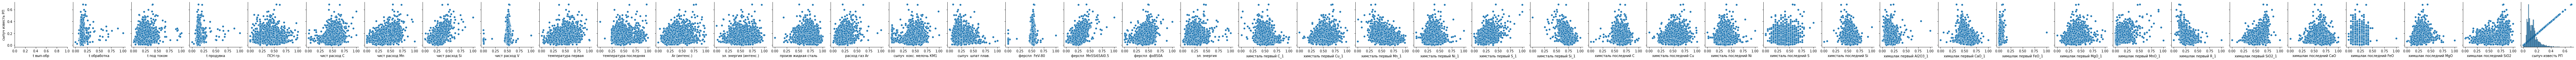

In [14]:
sns_plot = sns.pairplot(normalized_data,
                    x_vars=normalized_data.columns,
                    y_vars=TARGET)
sns_plot.savefig(f'{SOURCE_DIR}{FINAL_STAGE_DIR}multi_map_preprocessing.png')

* График дисперсии после заполнение NaN

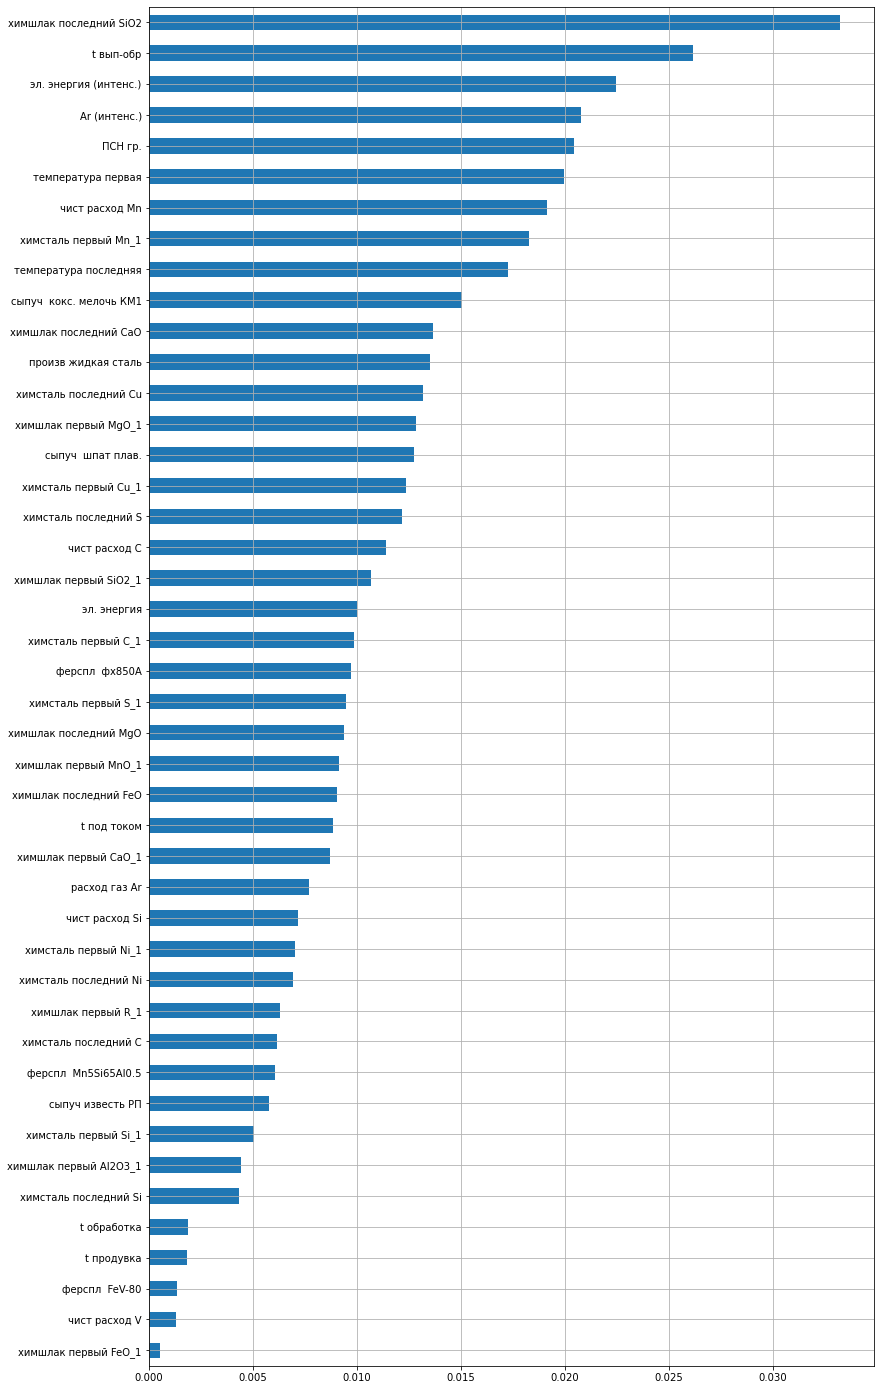

In [15]:
dispersion = normalized_data.var()
dispersion_ax = dispersion.sort_values().plot(kind='barh', figsize=(13, 25), grid=True)
dispersion_fig = dispersion_ax.get_figure()
dispersion_fig.savefig(f'{SOURCE_DIR}{FINAL_STAGE_DIR}dispersion_bar_postprocessing.png')

* По схожести графиков видно, что структура данных не была нарушена

In [16]:
corr_data = normalized_data.corr()

* График корреляции признакового пространства

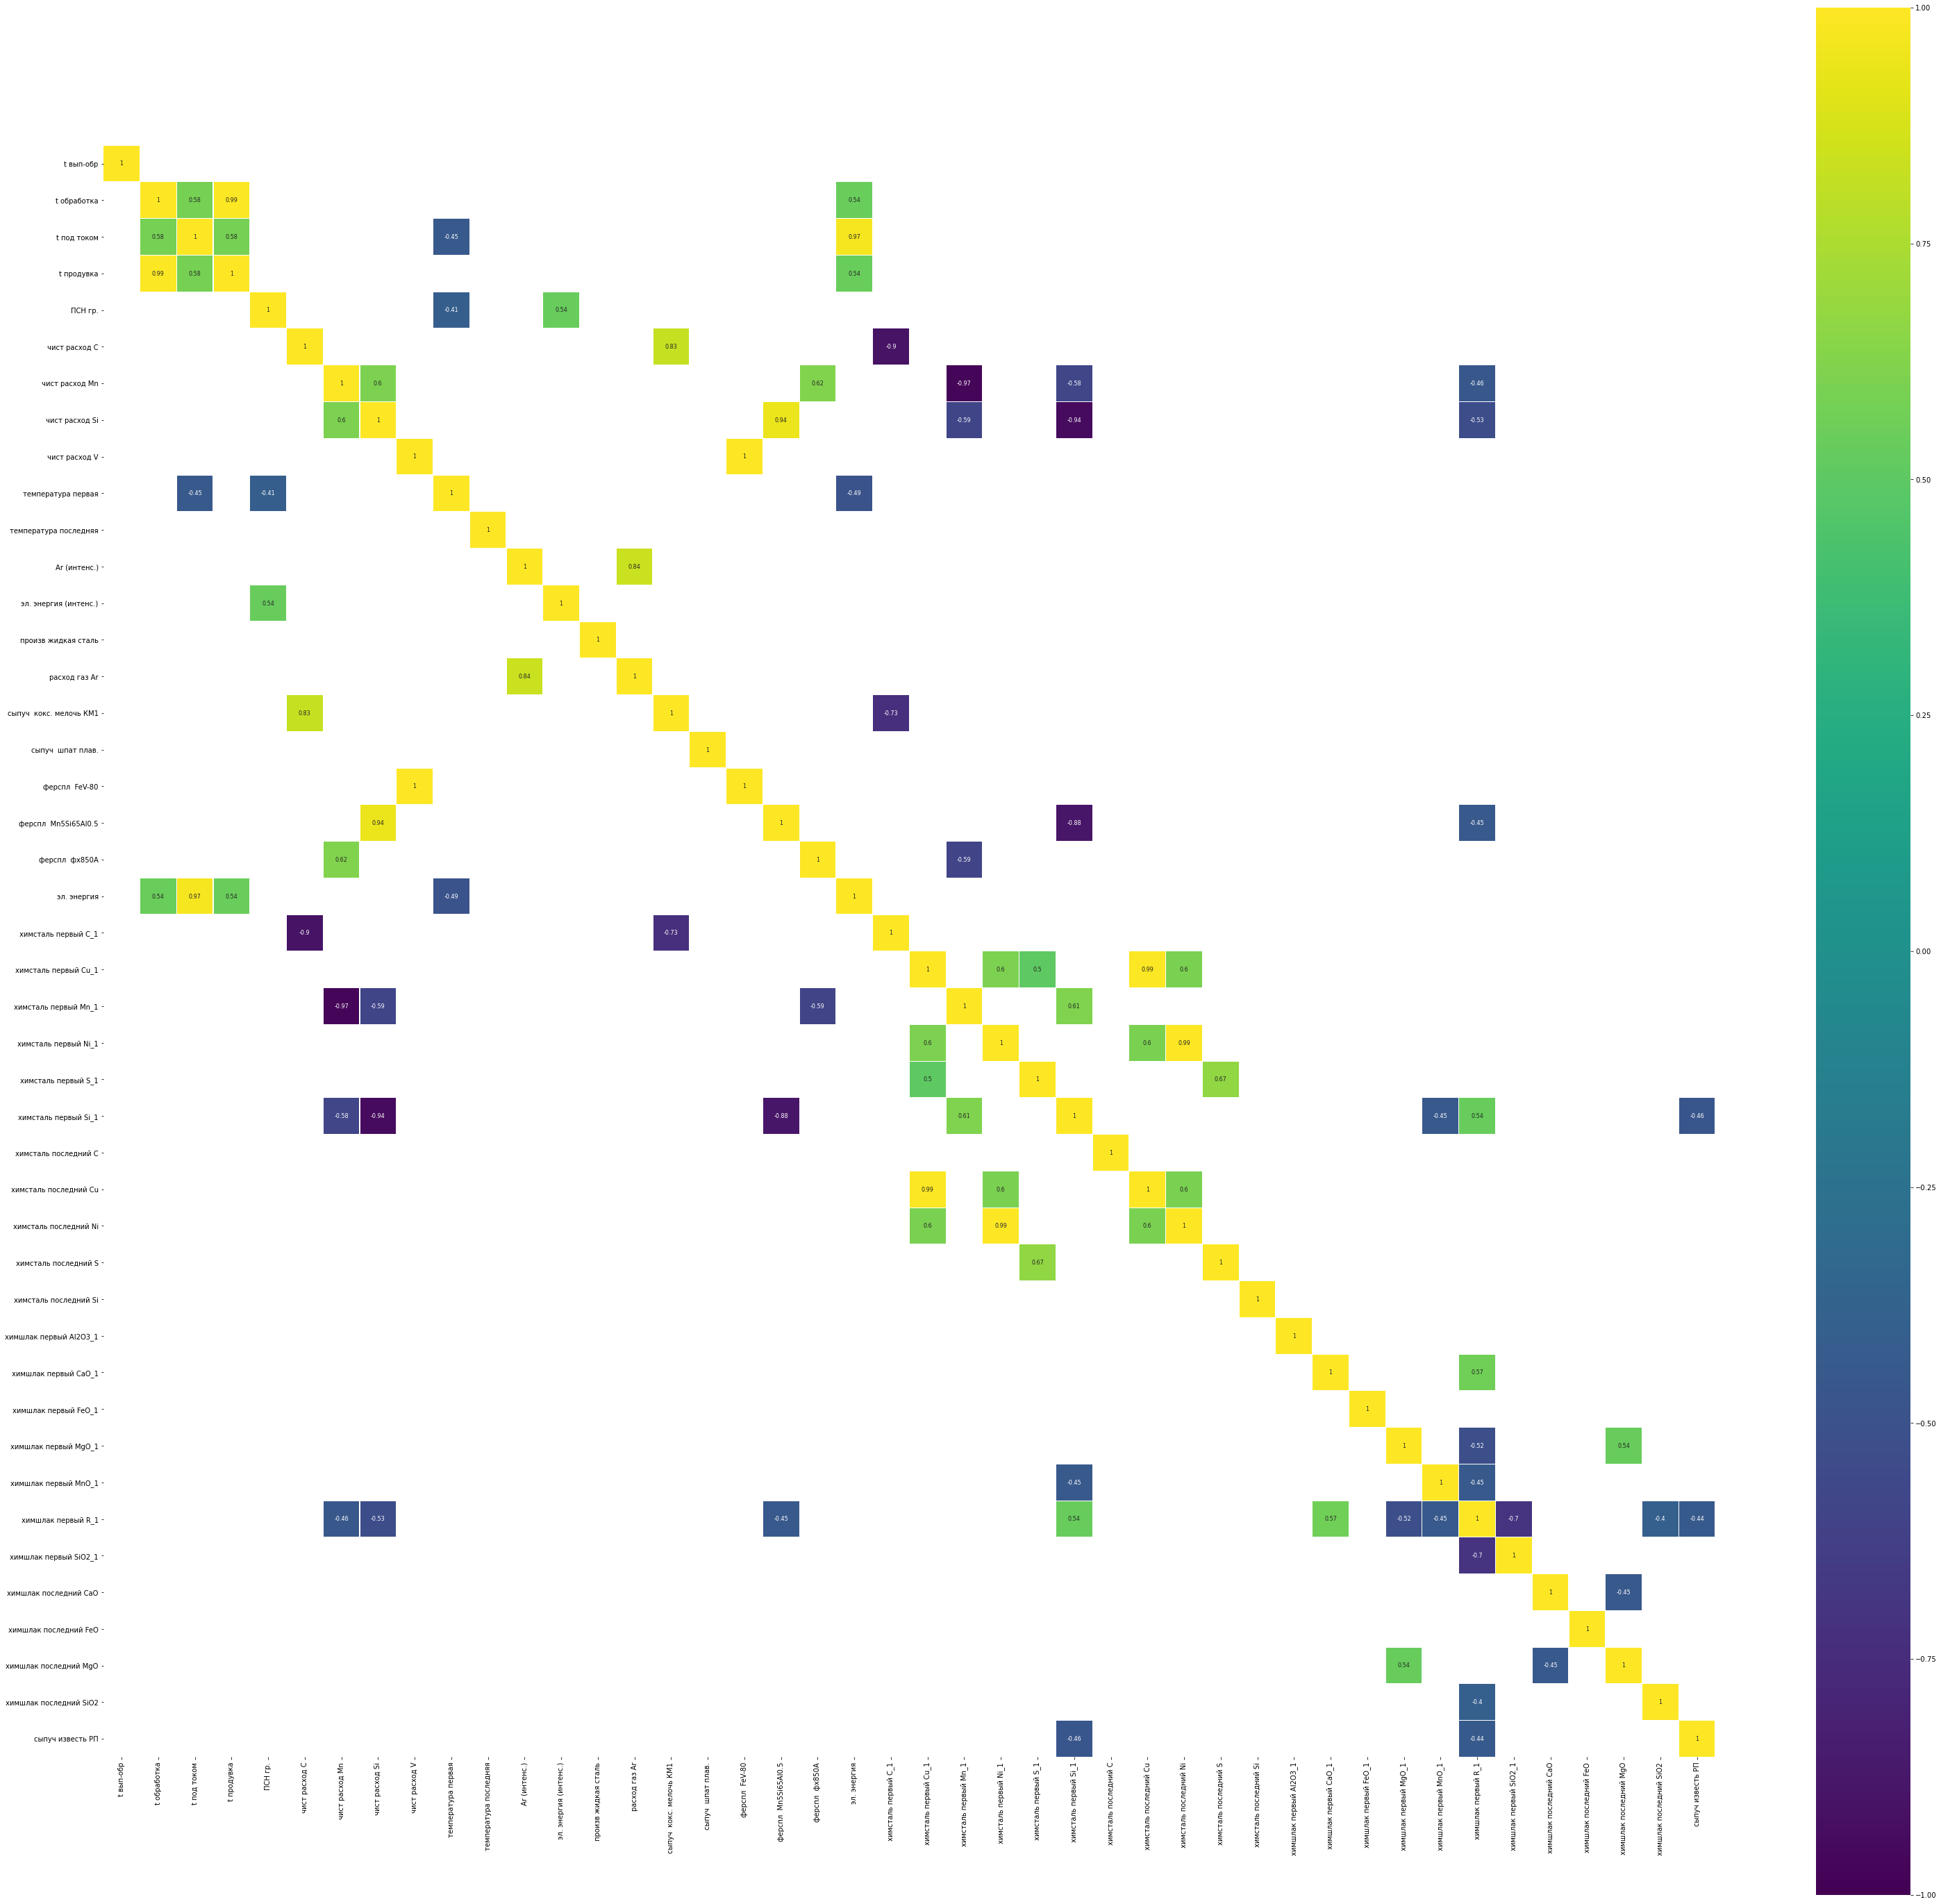

In [17]:
plt.figure(figsize=(52, 50))
sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
       cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
       annot=True, annot_kws={"size": 8}, square=True)
plt.savefig(f'{SOURCE_DIR}{FINAL_STAGE_DIR}correlation_map.png')
plt.show()

* График корреляции целевой переменой с признаками

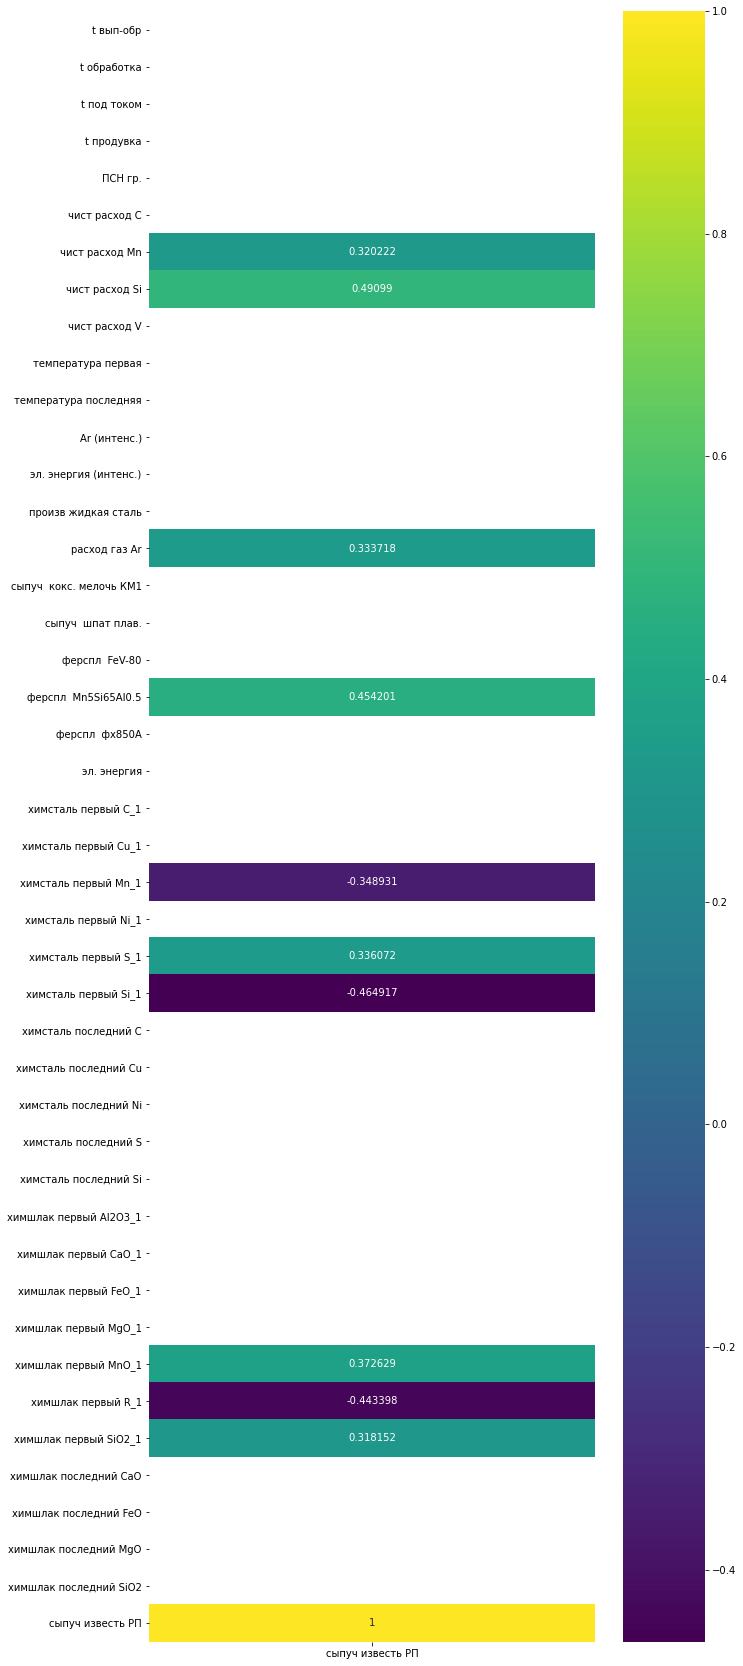

In [18]:
corr_target_data = corr_data[TARGET]
corr_df = pd.DataFrame(corr_target_data.values, columns=[TARGET], index=corr_data.index)
plt.figure(figsize=(10, 30))
sns.heatmap(corr_df[(corr_df >= 0.3) | (corr_df <= -0.3)], annot=True, fmt="g", cmap='viridis')
plt.savefig(f'{SOURCE_DIR}{FINAL_STAGE_DIR}correlation_target_map.png')
plt.show()

* По графику выше видно, что наша целевая переменная слабо коррелирует с признаками

* Гистрограмма распределения целевой переменной

<AxesSubplot:>

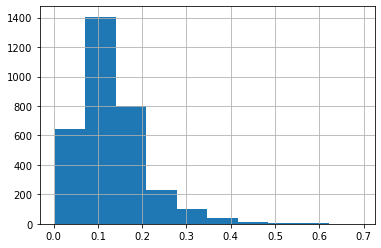

In [19]:
normalized_data[TARGET].hist()

* Разбиение датасета на обучающую и тестовую выборки

In [20]:
test_data = normalized_data.sample(frac= 0.3, random_state=42)
train_data = normalized_data.drop(test_data.index, axis='index')

In [21]:
X_test_data = test_data.drop(columns= TARGET)
labels_test_data = test_data[TARGET]
X_train_data = train_data.drop(columns= TARGET)
labels_train_data = train_data[TARGET]

In [22]:
X_train_data.to_csv(f'{DATA_DIR}{FINAL_STAGE_DIR}x_train.csv', sep = '\t')
X_test_data.to_csv(f'{DATA_DIR}{FINAL_STAGE_DIR}x_test.csv', sep = '\t')
labels_train_data.to_csv(f'{DATA_DIR}{FINAL_STAGE_DIR}y_train.csv', sep = '\t')
labels_test_data.to_csv(f'{DATA_DIR}{FINAL_STAGE_DIR}y_test.csv', sep = '\t')
